In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df = pd.read_csv('./data/gold/suicidio_sufoc.csv')

In [38]:
# Tratando o dado de object para datetime.
df['data_obito'] = pd.to_datetime(df['data_obito'])

# Criar uma nova coluna 'ano' para armazenar o ano de cada registro
df['ano'] = df['data_obito'].dt.year

# Configurar o estilo do seaborn
sns.set(style="whitegrid")

In [41]:
def visualizacao(dataframe, coluna):
    

    # Criar um DataFrame agregado por ano e a coluna que foi passada como parametro
    column_count_by_year = df.groupby(['ano', coluna]).size().reset_index(name='count')


    # Calcular as proporções em relação ao total de óbitos em cada ano
    column_count_by_year['proporcao'] = column_count_by_year.groupby('ano')['count'].transform(lambda x: x / x.sum())

    # Criar uma figura com dois subplots
    fig, axs = plt.subplots(1, 2, figsize=(18, 6))

    # Gráfico de linhas para contagens absolutas
    sns.lineplot(x='ano', y='count', hue=coluna, data=column_count_by_year, marker='o', linestyle='-', errorbar=None, ax=axs[0])
    axs[0].set_title(f'Progressão da Distribuição de Óbitos por {coluna} (Contagens) - 2000-2019')
    axs[0].set_xlabel('Ano')
    axs[0].set_ylabel('Número de Óbitos')
    axs[0].legend(title=f'{coluna}')

    # Gráfico de linhas para proporções
    sns.lineplot(x='ano', y='proporcao', hue=coluna, data=column_count_by_year, marker='o', linestyle='-', errorbar=None, ax=axs[1])
    axs[1].set_title(f'Progressão da Distribuição de Óbitos por {coluna} (Proporção) - 2000-2019')
    axs[1].set_xlabel('Ano')
    axs[1].set_ylabel('Proporção de Óbitos')
    axs[1].legend(title=f'{coluna}')


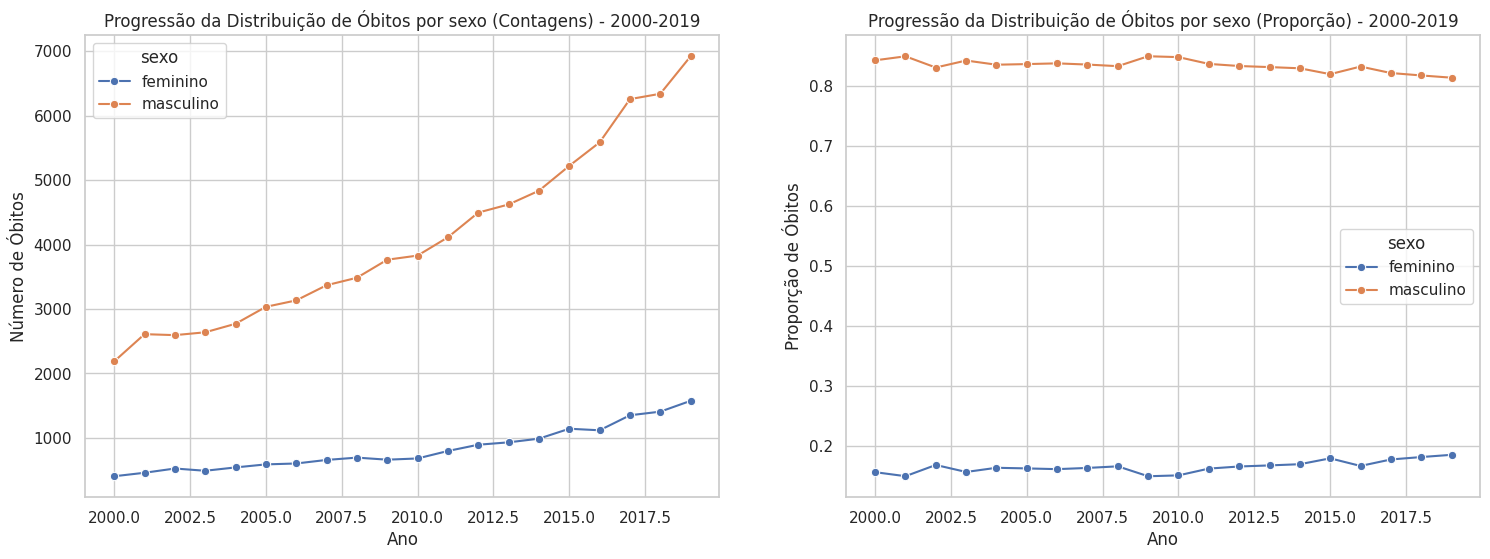

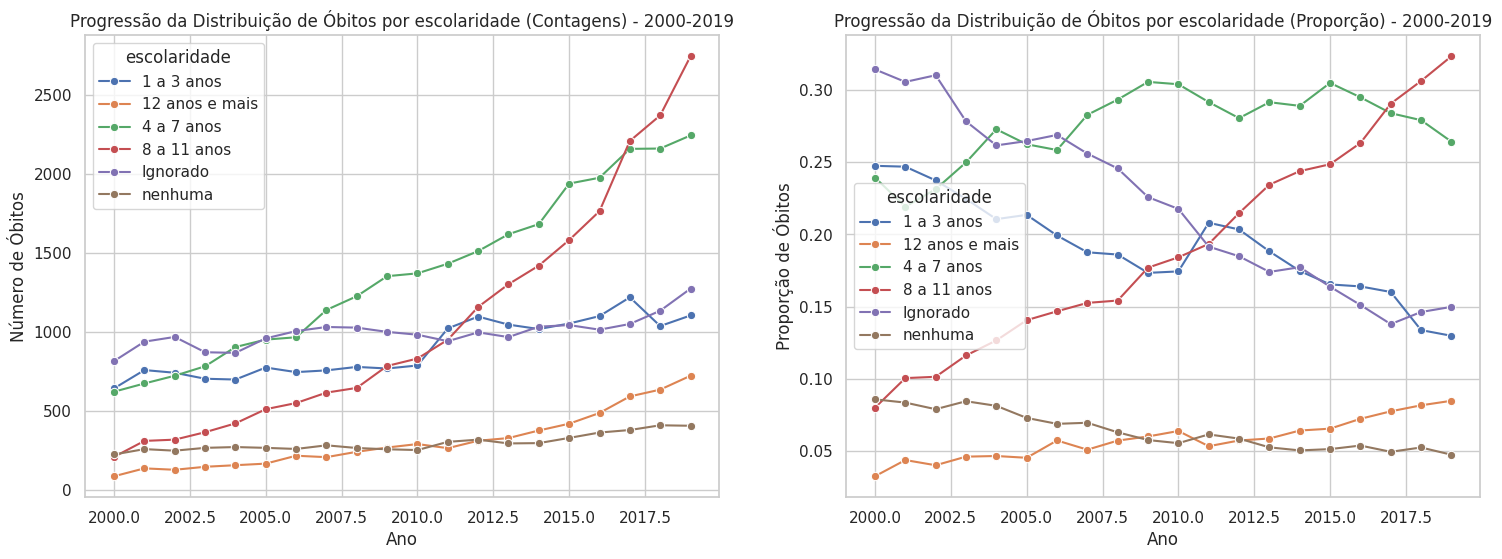

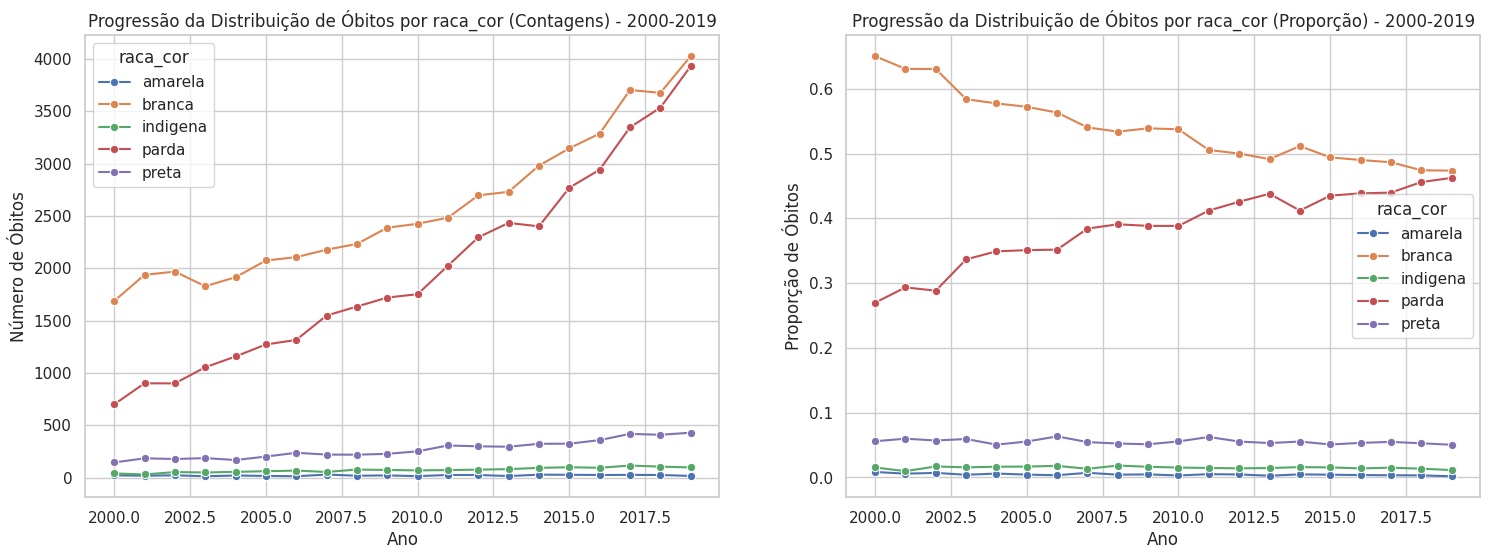

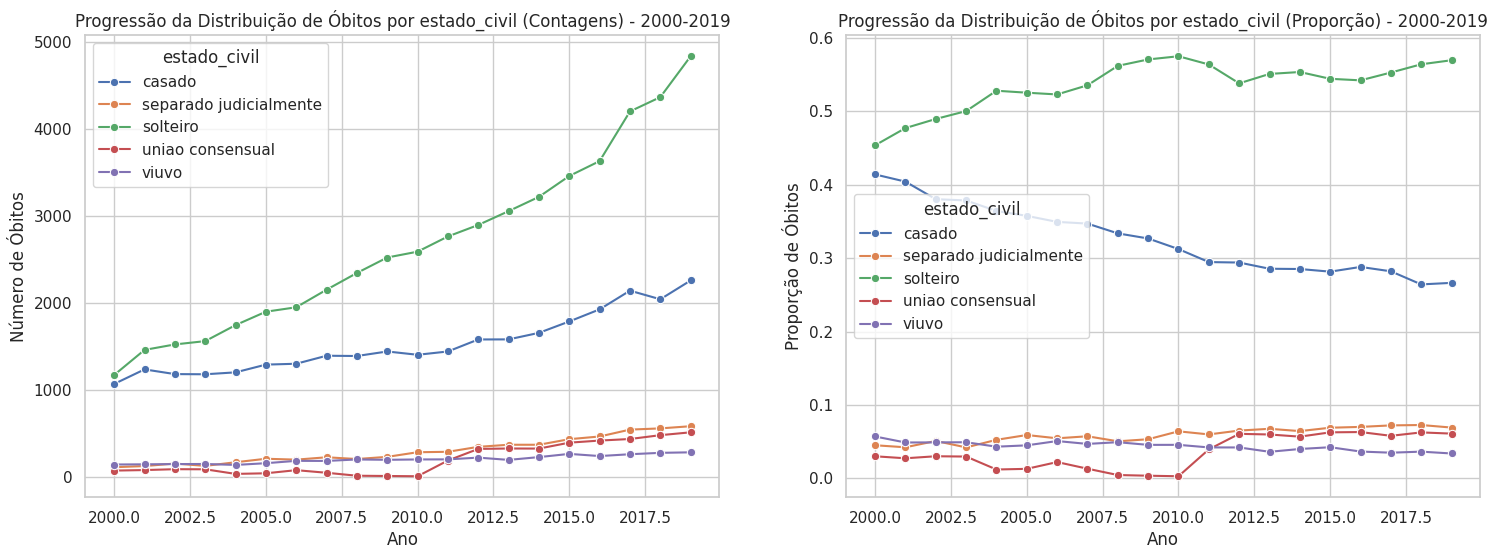

In [42]:
visualizacao(df, 'sexo')
visualizacao(df, 'escolaridade')
visualizacao(df, 'raca_cor')
visualizacao(df, 'estado_civil')

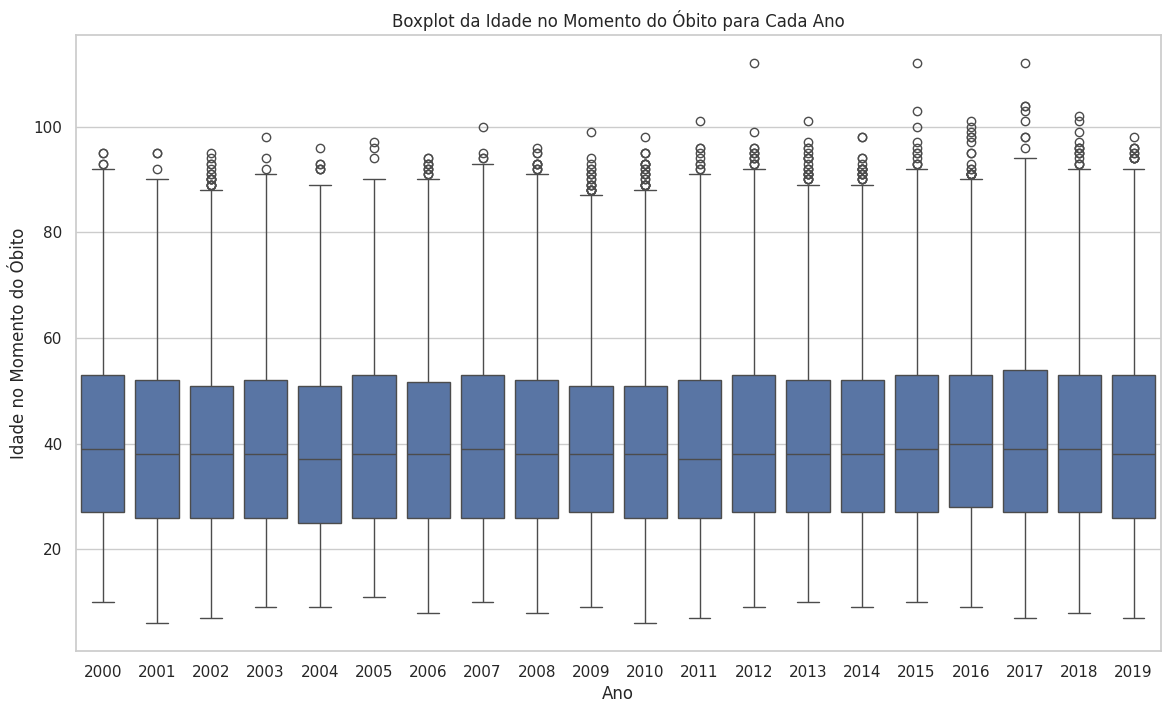

In [43]:
# Boxplot para a idade no momento do óbito para cada ano
plt.figure(figsize=(14, 8))
sns.boxplot(x='ano', y='idade_momento_obito', data=df)
plt.title('Boxplot da Idade no Momento do Óbito para Cada Ano')
plt.xlabel('Ano')
plt.ylabel('Idade no Momento do Óbito')
plt.show()